In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Final Project: NBA Quick Stats

In [77]:
team_name_map = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "NJN",
    "Charlotte Bobcats": "CHA",
    "Charlotte Hornets": "CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Hornets": "NOH",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

In [87]:
def team_specific_data(team, year):
    if team.startswith("Chicago Bulls"):
        print(f"Working on {year} {team}")
    
    if team.endswith('*'):
        team = team[:-1]
    
    team_abbrev = team_name_map[team]
    url = f"https://www.basketball-reference.com/teams/{team_abbrev}/{year}.html"
    table = pd.read_html(url, match='PER')[0]
    table['min_per_game'] = table['MP'] / table['G']
    table = table[table['min_per_game'] >= 15]
    
    per_list = list(table['PER'].sort_values(ascending=False))
    top_per_list = per_list[:3]
    age_list = list(table['Age'])

    best_per = per_list[0]
    top_per_avg = sum(top_per_list) / len(top_per_list)
    avg_age = sum(age_list) / len(age_list)
    
    return pd.Series([best_per, round(top_per_avg, 2), round(avg_age, 2)])

In [23]:
def compute_summary_stats(year):
    url = f"https://www.basketball-reference.com/leagues/NBA_{year}.html"
    tables = pd.read_html(url)
    
    east = tables[0].iloc[:,[0, 3]]
    east.rename(columns={'Eastern Conference': 'Team'}, inplace=True)
    east['Region'] = 'East'
    
    west = tables[1].iloc[:,[0, 3]]
    west.rename(columns={'Western Conference': 'Team'}, inplace=True)
    west['Region'] = 'West'
    
    all_teams = [east, west]
    all_teams = pd.concat(all_teams)
    all_teams = all_teams.reset_index()
    all_teams.drop('index', axis=1, inplace=True)
    
    if year >= 2016:
        df_total = tables[4].sort_values('PTS')
        df_total = df_total.merge(all_teams).sort_values('W/L%')
        df_total['Year'] = year
        df_total['W/L%'] = pd.to_numeric(df_total['W/L%'])
        df_total['TopTeamThisYear?'] = (df_total['W/L%'] >= df_total['W/L%'].quantile(0.75))
        return pd.DataFrame(df_total.sort_values('W/L%', ascending=False))
    else:
        df_total = tables[2].sort_values('PTS')
        df_total = df_total.merge(all_teams).sort_values('W/L%')
        df_total['Year'] = year
        df_total['W/L%'] = pd.to_numeric(df_total['W/L%'])
        df_total['TopTeamThisYear?'] = (df_total['W/L%'] >= df_total['W/L%'].quantile(0.75))
        return pd.DataFrame(df_total.sort_values('W/L%', ascending=False))

In [75]:
nba_data = []

for year in range(2012, 2022):
    print(f"Working on year {year}")
    nba_data.append(compute_summary_stats(year))
    
nba_data = pd.concat(nba_data)
nba_data

Working on year 2012
Working on year 2013
Working on year 2014
Working on year 2015
Working on year 2016
Working on year 2017
Working on year 2018
Working on year 2019
Working on year 2020
Working on year 2021


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,AST,STL,BLK,TOV,PF,PTS,W/L%,Region,Year,TopTeamThisYear?
12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,16.9,0.375,...,23.1,6.9,5.9,14.0,17.3,96.3,0.758,East,2012,True
28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,21.3,0.393,...,23.2,7.4,4.4,13.6,17.3,103.7,0.758,West,2012,True
27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,20.0,0.358,...,18.5,7.5,8.2,16.3,20.5,103.1,0.712,West,2012,True
23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,15.6,0.359,...,20.0,8.9,5.4,15.2,19.4,98.5,0.697,East,2012,True
17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,16.1,0.368,...,18.6,7.9,5.4,14.0,21.7,97.7,0.636,East,2012,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,28.0,Oklahoma City Thunder,72,241.0,38.8,88.0,0.441,11.9,35.1,0.339,...,22.1,7.0,4.4,16.1,18.1,105.0,0.306,West,2021,False
0,30.0,Cleveland Cavaliers,72,242.1,38.6,85.8,0.450,10.0,29.7,0.336,...,23.8,7.8,4.5,15.5,18.2,103.8,0.306,East,2021,False
1,29.0,Orlando Magic,72,240.7,38.3,89.2,0.429,10.9,31.8,0.343,...,21.8,6.9,4.4,12.8,17.2,104.0,0.292,East,2021,False
3,27.0,Detroit Pistons,72,242.1,38.7,85.6,0.452,11.6,32.9,0.351,...,24.2,7.4,5.2,14.9,20.5,106.6,0.278,East,2021,False


In [88]:
nba_data[['best_per','top_per_avg', 'age']] = nba_data.apply(
    lambda row : team_specific_data(row['Team'], row['Year']),
    axis=1
)

nba_data

Working on 2012 Chicago Bulls*
Working on 2013 Chicago Bulls*
Working on 2014 Chicago Bulls*
Working on 2015 Chicago Bulls*
Working on 2016 Chicago Bulls
Working on 2017 Chicago Bulls*
Working on 2018 Chicago Bulls
Working on 2019 Chicago Bulls
Working on 2020 Chicago Bulls
Working on 2021 Chicago Bulls


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV,PF,PTS,W/L%,Region,Year,TopTeamThisYear?,best_per,top_per_avg,age
12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,16.9,0.375,...,14.0,17.3,96.3,0.758,East,2012,True,23.0,20.77,27.44
28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,21.3,0.393,...,13.6,17.3,103.7,0.758,West,2012,True,24.1,22.87,28.00
27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,20.0,0.358,...,16.3,20.5,103.1,0.712,West,2012,True,26.2,23.40,26.00
23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,15.6,0.359,...,15.2,19.4,98.5,0.697,East,2012,True,30.7,25.30,28.50
17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,16.1,0.368,...,14.0,21.7,97.7,0.636,East,2012,True,19.3,18.57,26.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,28.0,Oklahoma City Thunder,72,241.0,38.8,88.0,0.441,11.9,35.1,0.339,...,16.1,18.1,105.0,0.306,West,2021,False,21.6,20.27,23.60
0,30.0,Cleveland Cavaliers,72,242.1,38.6,85.8,0.450,10.0,29.7,0.336,...,15.5,18.2,103.8,0.306,East,2021,False,20.5,20.20,25.53
1,29.0,Orlando Magic,72,240.7,38.3,89.2,0.429,10.9,31.8,0.343,...,12.8,17.2,104.0,0.292,East,2021,False,23.5,20.33,25.35
3,27.0,Detroit Pistons,72,242.1,38.7,85.6,0.452,11.6,32.9,0.351,...,14.9,20.5,106.6,0.278,East,2021,False,18.7,17.70,24.72


In [91]:
nba_data.to_csv('./test.csv')

# Questions

1. How have the basic stats (ie. 3-point FGs attempted, winning percentage, etc.) of NBA teams changed over the past decade? **[Ryan]**

2. Playoff team data vs Non-playoff team data over past decade **[Chris]**

3. What variable has the highest correlation with winning percentage among teams in the top 25% over the past decade? Is there a significant difference with this variable between the top 25% and bottom 25%? **[Jovanni]**

# Part 2

## Playoff Team Data vs. Non-Playoff Team Data

In [25]:
nba_data['Year_Bin'] = pd.cut(nba_data['Year'], [2011.5, 2014.5, 2017.5, 2021.5], 
                              labels=['2012-2014', '2015-2017', '2018-2021'])

playoff_data = nba_data[nba_data['Team'].str.endswith('*')]
playoff_data['Status'] = 'Playoffs'

lottery_data = nba_data[~nba_data['Team'].str.endswith('*')]
lottery_data['Status'] = 'Lottery'

nba_data = pd.concat([playoff_data, lottery_data])

display(playoff_data.head())
display(lottery_data.head())

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,BLK,TOV,PF,PTS,W/L%,Region,Year,TopTeamThisYear?,Year_Bin,Status
12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,16.9,0.375,...,5.9,14.0,17.3,96.3,0.758,East,2012,True,2012-2014,Playoffs
28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,21.3,0.393,...,4.4,13.6,17.3,103.7,0.758,West,2012,True,2012-2014,Playoffs
27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,20.0,0.358,...,8.2,16.3,20.5,103.1,0.712,West,2012,True,2012-2014,Playoffs
23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,15.6,0.359,...,5.4,15.2,19.4,98.5,0.697,East,2012,True,2012-2014,Playoffs
17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,16.1,0.368,...,5.4,14.0,21.7,97.7,0.636,East,2012,True,2012-2014,Playoffs


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,BLK,TOV,PF,PTS,W/L%,Region,Year,TopTeamThisYear?,Year_Bin,Status
21,9.0,Houston Rockets,66,243.4,37.7,84.0,0.449,7.2,20.2,0.359,...,4.8,14.5,20.4,98.1,0.515,West,2012,False,2012-2014,Lottery
22,8.0,Phoenix Suns,66,240.0,37.8,82.5,0.458,6.7,19.6,0.343,...,5.5,14.1,18.7,98.4,0.500,West,2012,False,2012-2014,Lottery
25,5.0,Milwaukee Bucks,66,240.4,37.9,85.6,0.443,6.6,19.2,0.345,...,5.1,14.1,19.3,99.0,0.470,East,2012,False,2012-2014,Lottery
14,16.0,Portland Trail Blazers,66,241.9,36.4,82.1,0.443,7.2,20.9,0.346,...,4.9,14.2,19.0,97.2,0.424,West,2012,False,2012-2014,Lottery
20,10.0,Minnesota Timberwolves,66,241.5,35.7,82.3,0.433,7.2,21.6,0.332,...,4.4,15.2,18.4,97.9,0.394,West,2012,False,2012-2014,Lottery


# Part 3

## Task 1: EDA and selecting the desired subset of the data 

First, we view the columns of the data.

In [26]:
nba_data.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'W/L%', 'Region', 'Year', 'TopTeamThisYear?',
       'Year_Bin', 'Status'],
      dtype='object')

There are 27 different columns that can be plotted. In order to produce a meaningful pairplot for exploratory data analysis, we select the variables most correlated with win-loss ratio.

In [27]:
corr_gross = nba_data.corrwith(nba_data['W/L%'])
corr_gross.sort_values(ascending = False)

W/L%                1.000000
TopTeamThisYear?    0.736341
FG%                 0.643295
3P%                 0.559170
2P%                 0.478336
PTS                 0.364253
DRB                 0.360060
FG                  0.347883
BLK                 0.309345
AST                 0.296048
TRB                 0.290052
3P                  0.233018
FT%                 0.199781
FT                  0.193864
STL                 0.180856
3PA                 0.138322
FTA                 0.116970
2P                  0.085043
MP                  0.054469
G                   0.043911
Year               -0.004086
FGA                -0.056216
ORB                -0.113787
PF                 -0.185701
2PA                -0.223344
TOV                -0.228249
Rk                 -0.594997
dtype: float64

We find that the 4 variables most correlated with W/L% are Field Goal Percentage, 3-Point Field Goal Percentage, 2-Point Field Goal Percentage, and Points; 'TopTeamThisYear?' is not an explanatory variable of interest as it is only used to identify teams within the top 25% win-loss ratio annually.

In [28]:
nba_data[['W/L%', 'FG%','3P%','2P%', 'PTS']].corr()

,W/L%,FG%,3P%,2P%,PTS
W/L%,1.000000,0.643295,0.559170,0.478336,0.364253
FG%,0.643295,1.000000,0.600355,0.807179,0.618376
3P%,0.559170,0.600355,1.000000,0.374939,0.395114
2P%,0.478336,0.807179,0.374939,1.000000,0.857804
PTS,0.364253,0.618376,0.395114,0.857804,1.000000


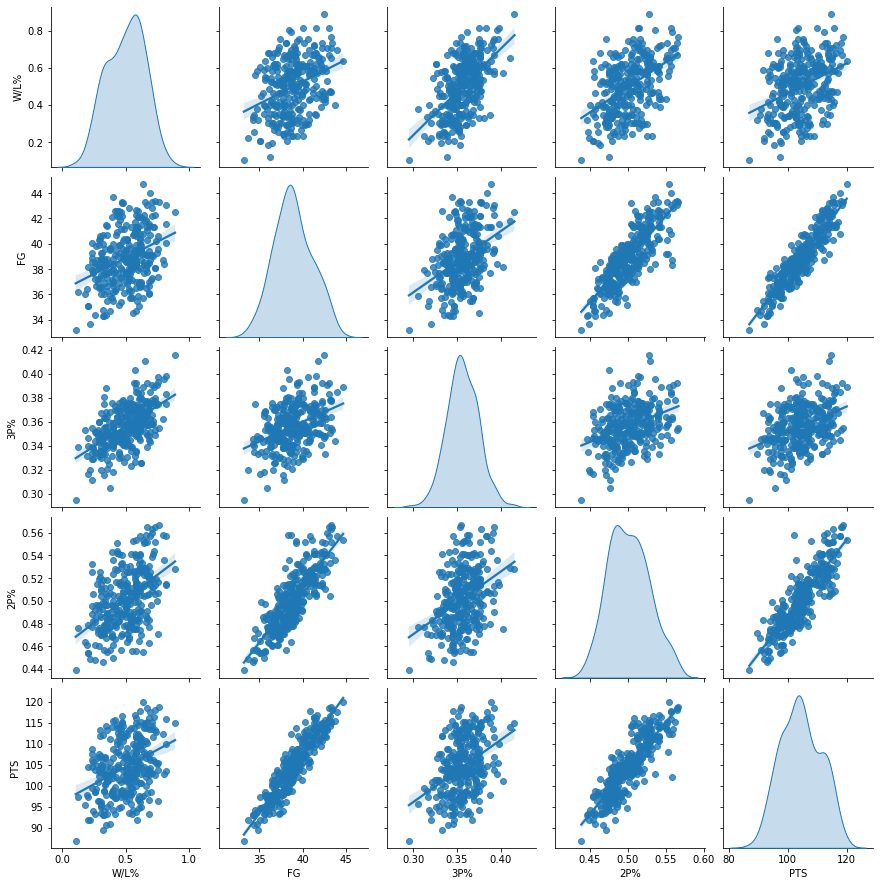

In [29]:
sns.pairplot(nba_data[['W/L%', 'FG','3P%','2P%','PTS']], kind = 'reg', diag_kind = 'kde')

There appears to be high multicollinearity (more/less than 0.5 or -0.5) between 'FG%' and the other 3 variables. Therefore we will be focusing on 'FG%', the variable most correlated with 'W/L%'.

From the pairplot, it appears that the data are normally distributed. As expected from the correlation grid, the explanatory variables are highly correlated with each other, some moreso than their correlation with 'W/L%'. This makes sense as 2-Point Field Goals and 3-Point Field Goals are simply categories of Field Goals, and Points are gained from Field Goals.

# Task 2: Hypothesis testing and validating trends

Is the mean field goal percentage significantly higher in the top 25% of teams by win percentage compared to the bottom 75% in 2021?

In [30]:
from scipy import stats
nba_data_top_wins_2021 = nba_data[(nba_data['TopTeamThisYear?'] == True) & (nba_data['Year'] == 2021)]
nba_data_bottom_wins_2021 = nba_data[(nba_data['TopTeamThisYear?'] == False) & (nba_data['Year'] == 2021)]
stats.ttest_ind(nba_data_top_wins_2021['FG%'], nba_data_bottom_wins_2021['FG%'])

Ttest_indResult(statistic=3.328065311813287, pvalue=0.0024574525484994535)

In [31]:
top_mean = nba_data_top_wins_2021['FG%'].mean()
bottom_mean = nba_data_bottom_wins_2021['FG%'].mean()
print("Mean FG% for teams in top 25% of W/L%:", top_mean)
print("Mean FG% for teams in bottom 75% of W/L%:", bottom_mean)
print("Difference in means:", top_mean - bottom_mean)

Mean FG% for teams in top 25% of W/L%: 0.4776999999999999
Mean FG% for teams in bottom 75% of W/L%: 0.4602500000000001
Difference in means: 0.0174499999999998


Yes, there appears to be a significant difference in the field goal percentage between the best teams and the rest of them. This implies that it is important to make one's shots count, not just getting the most points by shooting often.

Does this difference appear to hold between the top and bottom teams in the east and west annually?

Text(0.5, 1.02, 'Field Goal Percentage by Year and Win Percentage')

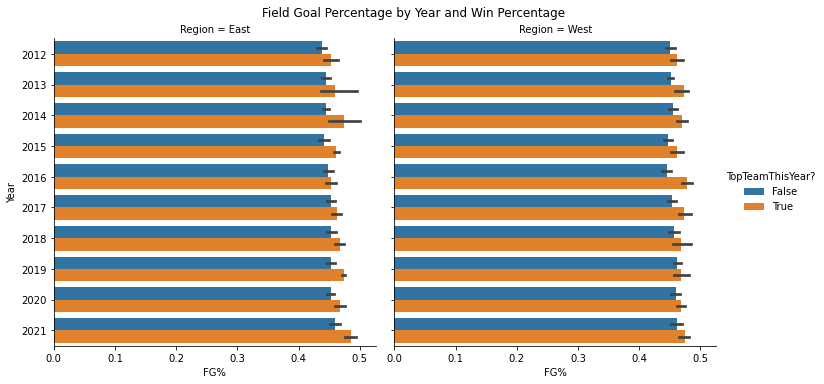

In [32]:
sns.catplot(x='FG%', y='Year', hue='TopTeamThisYear?', col='Region', data=nba_data, kind='bar', orient='h')
plt.suptitle('Field Goal Percentage by Year and Win Percentage', y=1.02)

Although the difference may seem insignificant at first, there is a consistent trend of a higher Field Goal Percentage for teams in the top 25% of Win/Loss Percentage, for each year and region; note that a significant difference was found in 2021 with a mean difference of about 1.7%.